In [1]:
# import the required packages
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, CountFrequencyEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser,EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
hr_data = pd.read_csv('hr_data.csv')
hr_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df_hr = hr_data.copy()

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df_hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df_hr.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [7]:
df_hr['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [8]:
df_hr['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [9]:
df_hr['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [10]:
df_hr['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
df_hr['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

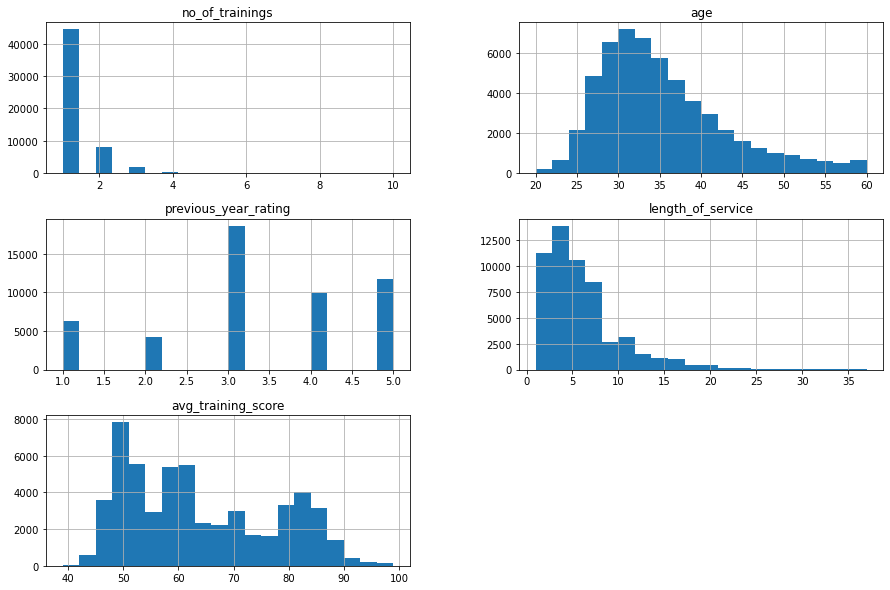

In [12]:
df_hr[['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']].hist(bins=20,figsize=(15,10))
plt.show()

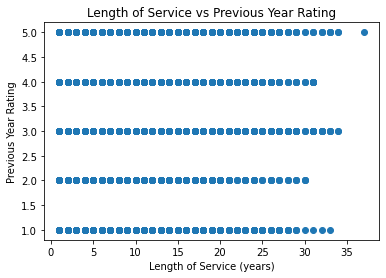

In [13]:
plt.scatter(df_hr['length_of_service'],df_hr['previous_year_rating'])
plt.xlabel('Length of Service (years)')
plt.ylabel('Previous Year Rating')
plt.title('Length of Service vs Previous Year Rating')

plt.show()

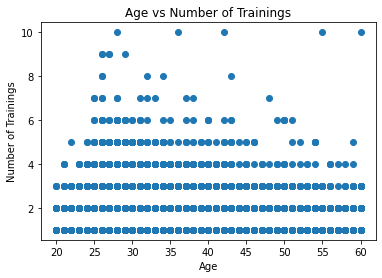

In [14]:
plt.scatter(df_hr['age'],df_hr['no_of_trainings'])
plt.xlabel('Age')
plt.ylabel('Number of Trainings')
plt.title('Age vs Number of Trainings')

plt.show()

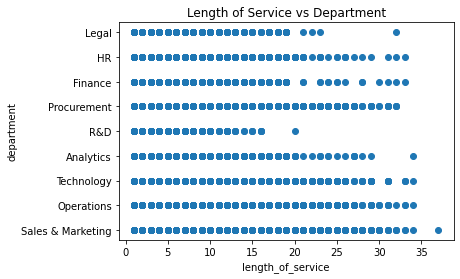

In [15]:
plt.scatter(df_hr['length_of_service'] ,df_hr['department'] ) 

plt.title('Length of Service vs Department')
plt.ylabel('department')
plt.xlabel('length_of_service')

plt.show()

In [16]:
df_hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
df_hr[['education','previous_year_rating']].isnull().mean().sort_values()

education               0.043953
previous_year_rating    0.075244
dtype: float64

In [18]:
data_tf = hr_data.copy()
num_cols = [c for c in hr_data.columns if hr_data[c].dtypes!='O']
def find_outliers_IQR(df):
    
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    print('percentage of outliers: '+ str(len(outliers)/len(df)))
    print('number of outliers: '+ str(len(outliers)))

for i in num_cols:
    print(i)
    find_outliers_IQR(data_tf[i])
    print()

employee_id
percentage of outliers: 0.0
number of outliers: 0

no_of_trainings
percentage of outliers: 0.19030068603123632
number of outliers: 10430

age
percentage of outliers: 0.02618230915194862
number of outliers: 1435

previous_year_rating
percentage of outliers: 0.1135418187125967
number of outliers: 6223

length_of_service
percentage of outliers: 0.06365858998686323
number of outliers: 3489

KPIs_met >80%
percentage of outliers: 0.0
number of outliers: 0

awards_won?
percentage of outliers: 0.023171799737264635
number of outliers: 1270

avg_training_score
percentage of outliers: 0.0
number of outliers: 0

is_promoted
percentage of outliers: 0.08517004816815063
number of outliers: 4668



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


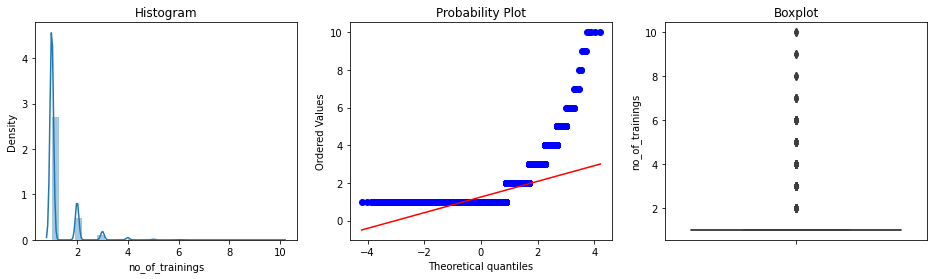

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


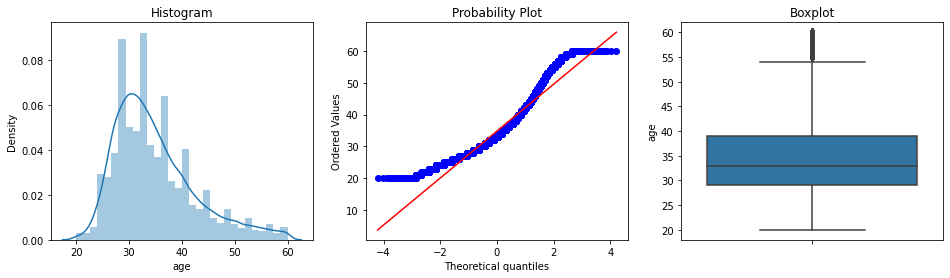

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


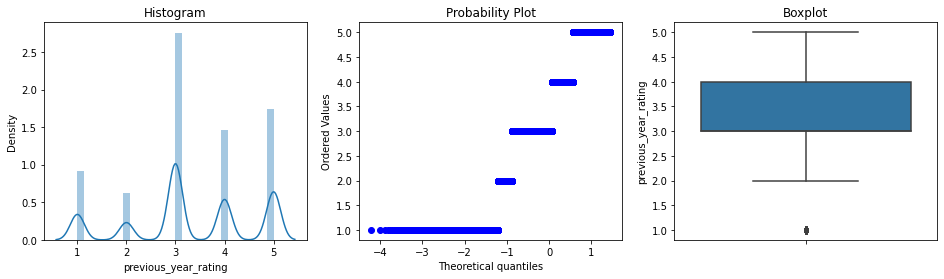

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


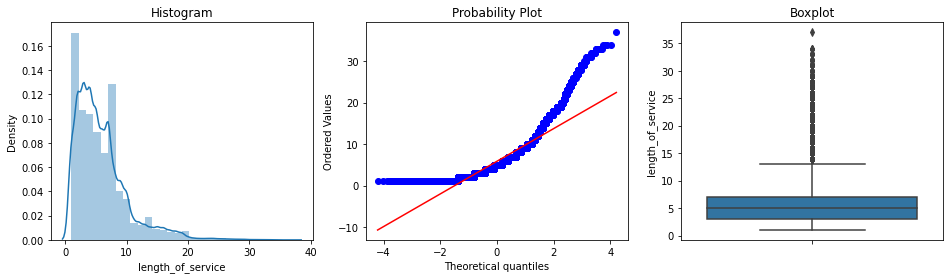

In [19]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
diagnostic_plots(data_tf, 'no_of_trainings')
diagnostic_plots(data_tf, 'age')
diagnostic_plots(data_tf, 'previous_year_rating')
diagnostic_plots(data_tf, 'length_of_service')

### 1.2 Cleanse and Transform the data

In [20]:
pipe = Pipeline(steps=[
    ('imp_num_median', mdi.MeanMedianImputer(imputation_method = 'median', variables='previous_year_rating')),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables ='education', imputation_method='frequent')),
])

pipe.fit(df_hr)

df_hr = pipe.transform(df_hr)
df_hr[['education','previous_year_rating']].isnull().mean().sort_values()

education               0.0
previous_year_rating    0.0
dtype: float64

In [21]:
df_hr['education'] = df_hr['education'].replace(("Master's & above",
                                                     "Bachelor's", "Below Secondary"),(3, 2, 1))

count_enc = CountFrequencyEncoder(
    encoding_method='count',
    variables='region')
count_enc.fit(df_hr)
df_hr = count_enc.transform(df_hr)

ohe_enc = OneHotEncoder(
    top_categories=5,  
    variables=None,
    drop_last=False)
ohe_enc.fit(df_hr)
df_hr = ohe_enc.transform(df_hr)

no_of_trainings


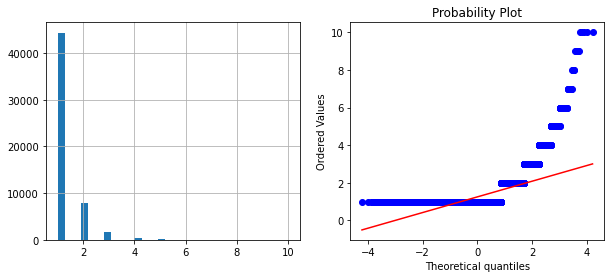

age


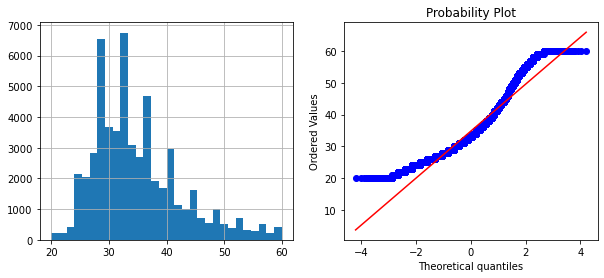

length_of_service


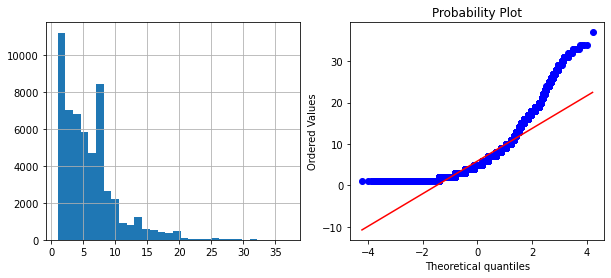

avg_training_score


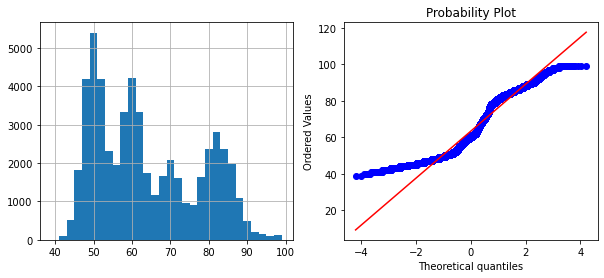

In [22]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    print(variable)
    plt.show()
    
diagnostic_plots(df_hr, 'no_of_trainings')
diagnostic_plots(df_hr, 'age')
diagnostic_plots(df_hr, 'length_of_service')
diagnostic_plots(df_hr, 'avg_training_score')

In [23]:
df_hr[['no_of_trainings']] = np.log(df_hr[['no_of_trainings']])
df_hr[['age']] = np.log(df_hr[['age']])
df_hr[['length_of_service']] = np.log(df_hr[['length_of_service']])
df_hr[['avg_training_score']] = np.log(df_hr[['avg_training_score']])

no_of_trainings


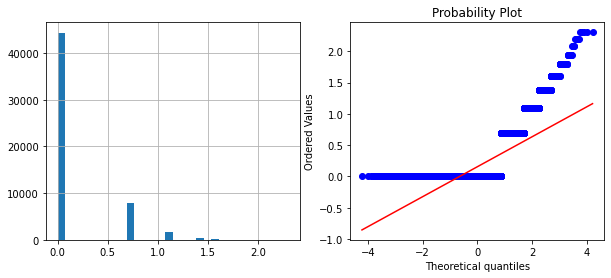

age


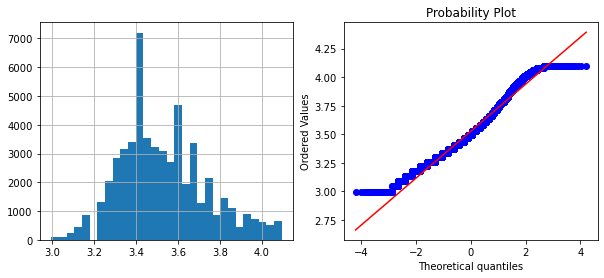

length_of_service


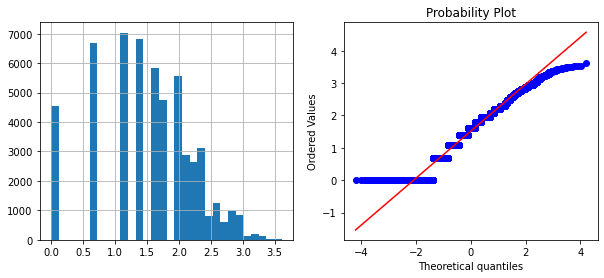

avg_training_score


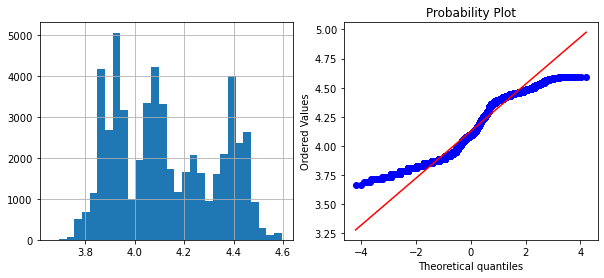

In [24]:
diagnostic_plots(df_hr, 'no_of_trainings')
diagnostic_plots(df_hr, 'age')
diagnostic_plots(df_hr, 'length_of_service')
diagnostic_plots(df_hr, 'avg_training_score')

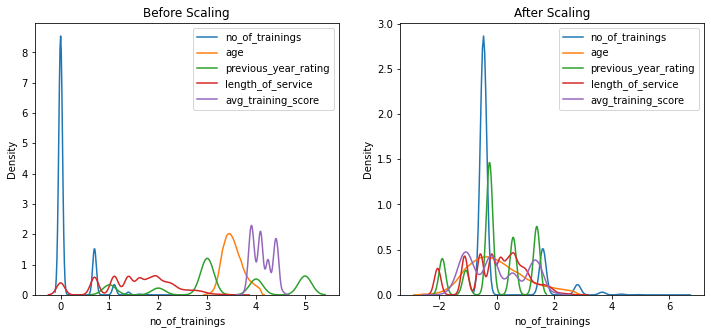

In [25]:
num_cols = ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
df_target = df_hr['is_promoted']
df_scale = df_hr.drop(columns=['is_promoted'])
#scaler = StandardScaler()
#scaler.fit(df_hr)
#df_hr_scaled = scaler.transform(df_hr)
#df_hr_sScaled = pd.DataFrame(df_hr_scaled, columns=df_hr.columns)
scaler = StandardScaler()
scaler.fit(df_scale)
df_hr_scaled = scaler.transform(df_scale)
df_hr_sScaled = pd.DataFrame(df_hr_scaled, columns=df_scale.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')

for i in num_cols:
    sns.kdeplot(df_hr[i], ax=ax1, label =i)

ax1.legend()

ax2.set_title('After Scaling')

for i in num_cols:
    sns.kdeplot(df_hr_sScaled[i], ax=ax2, label =i)
    
ax2.legend()
plt.show()

In [26]:
df_hr_sScaled = df_hr_sScaled.reset_index(drop=True)
df_target = df_target.reset_index(drop=True)
df_hr = df_hr_sScaled
df_hr['is_promoted'] = df_target

### 1.3 Correlation Analysis

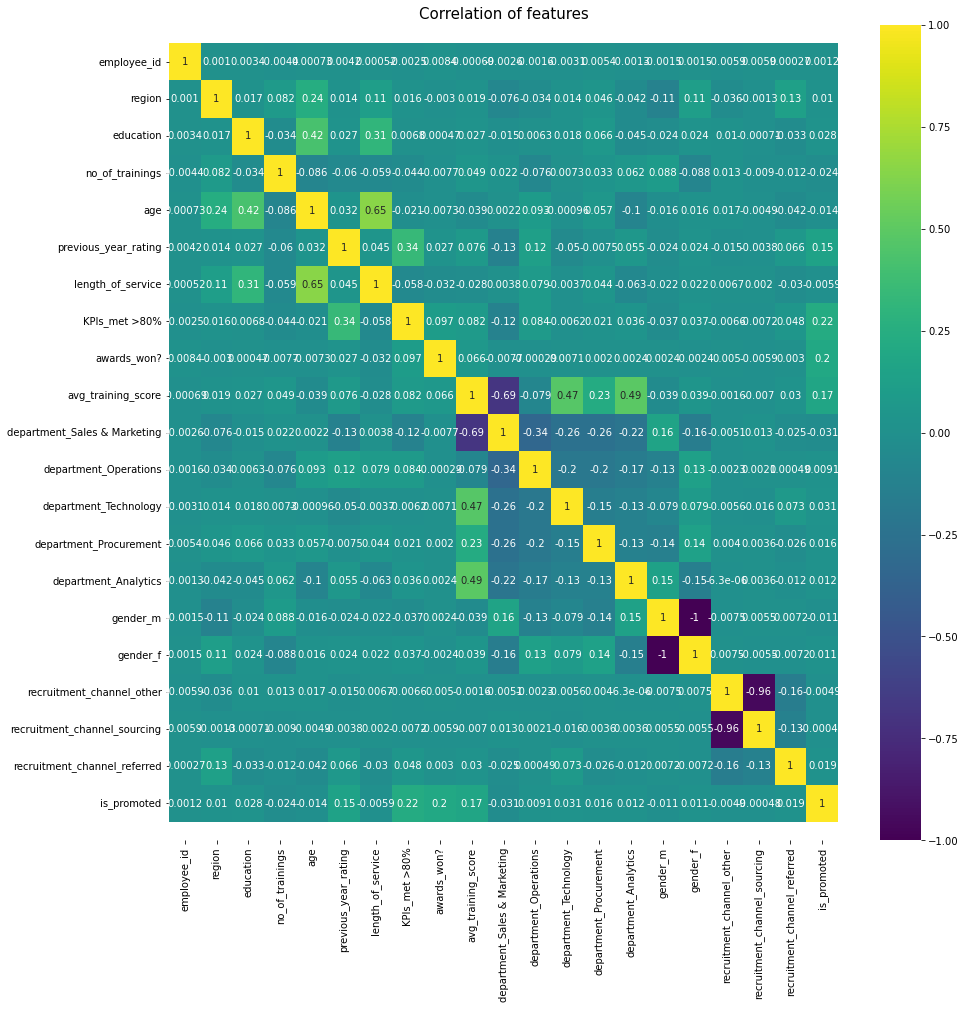

In [27]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of features', size=15)
ax = sns.heatmap(df_hr.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [28]:
df_hr['total_score'] = df_hr['avg_training_score'] * df_hr['no_of_trainings']
df_hr['awards_per_year'] = df_hr['awards_won?'] / df_hr['length_of_service']

In [29]:
df_hr = df_hr.drop(['employee_id'], axis = 1)

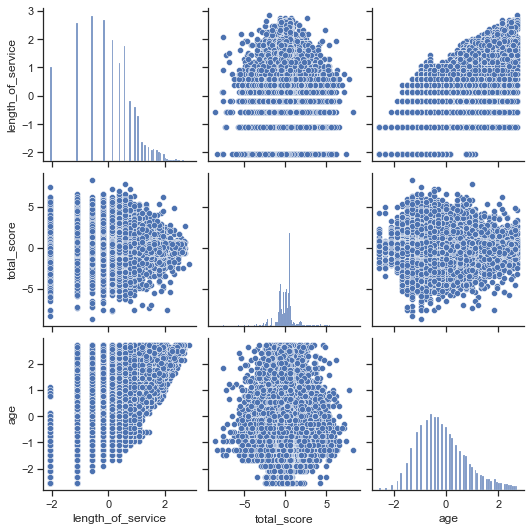

In [30]:
sns.set(style="ticks")
sns.pairplot(df_hr[['length_of_service','total_score','age']])

In [31]:
attribute_names = list(df_hr.columns)
attribute_names.remove('is_promoted')
class_name = 'is_promoted'

In [32]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = df_hr[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
0    50140
1     4668
Name: is_promoted, dtype: int64

Gini Impurity of the class is 0.156


In [33]:
def gini_split_a(attribute_name):
    attribute_values = df_hr[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = df_hr[class_name][df_hr[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df_hr.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for region is 0.154
Gini for education is 0.156
Gini for no_of_trainings is 0.156
Gini for age is 0.156
Gini for previous_year_rating is 0.152
Gini for length_of_service is 0.156
Gini for KPIs_met >80% is 0.148
Gini for awards_won? is 0.150
Gini for avg_training_score is 0.139
Gini for department_Sales & Marketing is 0.156
Gini for department_Operations is 0.156
Gini for department_Technology is 0.156
Gini for department_Procurement is 0.156
Gini for department_Analytics is 0.156
Gini for gender_m is 0.156
Gini for gender_f is 0.156
Gini for recruitment_channel_other is 0.156
Gini for recruitment_channel_sourcing is 0.156
Gini for recruitment_channel_referred is 0.156
Gini for total_score is 0.138
Gini for awards_per_year is 0.150


In [34]:
min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

print('The selected attiribute is: total_score')

The minimum value of Gini Impurity : 0.138 
The maximum value of Gini Gain     : 0.862 
The selected attiribute is: total_score


### 1.4 Export the data

In [35]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        54808 non-null  float64
 1   education                     54808 non-null  float64
 2   no_of_trainings               54808 non-null  float64
 3   age                           54808 non-null  float64
 4   previous_year_rating          54808 non-null  float64
 5   length_of_service             54808 non-null  float64
 6   KPIs_met >80%                 54808 non-null  float64
 7   awards_won?                   54808 non-null  float64
 8   avg_training_score            54808 non-null  float64
 9   department_Sales & Marketing  54808 non-null  float64
 10  department_Operations         54808 non-null  float64
 11  department_Technology         54808 non-null  float64
 12  department_Procurement        54808 non-null  float64
 13  d

In [36]:
df_hr.to_csv('hr_data_new.csv', index=False)

## 2. Airbnb

### 2.1 Load and Explore the data

In [37]:
airbnb = pd.read_csv('listings.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [38]:
df_airbnb = airbnb.copy()

In [39]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [40]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [41]:
df_airbnb.describe(include = 'object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


In [42]:
df_airbnb['neighbourhood_group'].value_counts()

Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64

In [43]:
df_airbnb['neighbourhood'].value_counts()

Kallang                    1043
Geylang                     994
Novena                      537
Rochor                      536
Outram                      477
Bukit Merah                 470
Downtown Core               428
Bedok                       373
River Valley                362
Queenstown                  266
Tanglin                     210
Singapore River             175
Marine Parade               171
Jurong West                 153
Orchard                     136
Newton                      134
Bukit Timah                 131
Jurong East                 118
Hougang                     109
Clementi                    102
Toa Payoh                   101
Pasir Ris                    71
Serangoon                    69
Sengkang                     67
Woodlands                    67
Bukit Batok                  65
Tampines                     64
Museum                       63
Choa Chu Kang                63
Ang Mo Kio                   58
Bishan                       57
Yishun  

In [44]:
df_airbnb['room_type'].value_counts()

Entire home/apt    4132
Private room       3381
Shared room         394
Name: room_type, dtype: int64

In [45]:
df_airbnb['last_review'].value_counts()

2019-08-12    152
2019-08-11    128
2019-08-13    110
2019-08-10     87
2019-08-08     78
             ... 
2016-12-03      1
2016-01-18      1
2016-07-27      1
2017-08-19      1
2019-03-22      1
Name: last_review, Length: 1001, dtype: int64

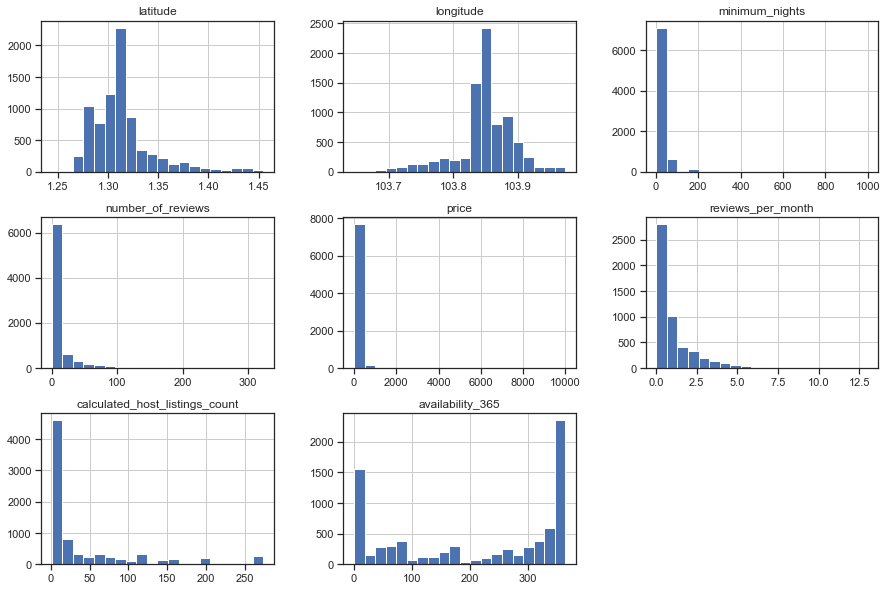

In [46]:
df_airbnb[['latitude','longitude','minimum_nights','number_of_reviews','price','reviews_per_month','calculated_host_listings_count','availability_365']].hist(bins=20,figsize=(15,10))
plt.show()

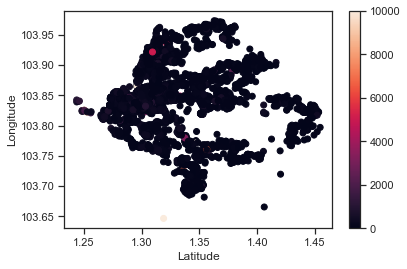

In [47]:
plt.scatter(df_airbnb['latitude'] ,df_airbnb['longitude'], c=df_airbnb['price']) 

plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.colorbar()

plt.show()

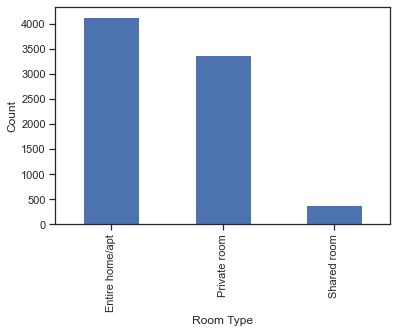

In [48]:
df_airbnb['room_type'].value_counts().plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

In [49]:
df_airbnb.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [50]:
df_airbnb[['name','last_review','reviews_per_month']].isnull().mean().sort_values()

name                 0.000253
last_review          0.348805
reviews_per_month    0.348805
dtype: float64

In [51]:
null_rows = df_airbnb[df_airbnb['last_review'].isnull()]
null_rows.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18,355955,Double room in an Authentic Peranakan Shophouse,1759905,Aresha,Central Region,Geylang,1.31420,103.90232,Private room,81,90,0,NaN,NaN,1,173
23,481789,Master Bedroom in Newly Built Flat,2386154,Susan,East Region,Tampines,1.34816,103.93238,Private room,37,180,0,NaN,NaN,1,365
26,642660,BEST CITY LIVING WITH GA RESIDENCE,3212572,Roger,Central Region,Rochor,1.30109,103.85234,Private room,167,180,0,NaN,NaN,1,365
28,719944,HDB housing in prime area near town,3648224,Audrey,Central Region,Queenstown,1.30901,103.79639,Shared room,208,1,0,NaN,NaN,1,0
29,733863,Homestay at Serangoon,3824517,Shirlnet,North-East Region,Serangoon,1.36743,103.87288,Private room,26,180,0,NaN,NaN,1,365


In [52]:
data_tf = df_airbnb.copy()
num_cols = [c for c in df_airbnb.columns if df_airbnb[c].dtypes!='O']

for i in num_cols:
    print(i)
    find_outliers_IQR(data_tf[i])
    print()

id
percentage of outliers: 0.0
number of outliers: 0

host_id
percentage of outliers: 0.0
number of outliers: 0

latitude
percentage of outliers: 0.07739977235361073
number of outliers: 612

longitude
percentage of outliers: 0.10762615404072341
number of outliers: 851

price
percentage of outliers: 0.04097635006955862
number of outliers: 324

minimum_nights
percentage of outliers: 0.17794359428354622
number of outliers: 1407

number_of_reviews
percentage of outliers: 0.13937017832300494
number of outliers: 1102

reviews_per_month
percentage of outliers: 0.050841026938156064
number of outliers: 402

calculated_host_listings_count
percentage of outliers: 0.0980144176046541
number of outliers: 775

availability_365
percentage of outliers: 0.0
number of outliers: 0



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


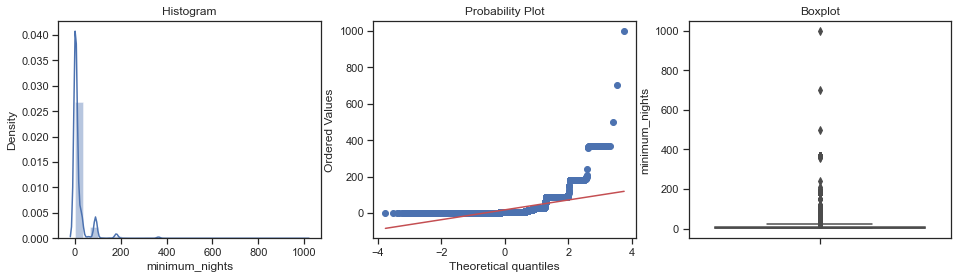

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


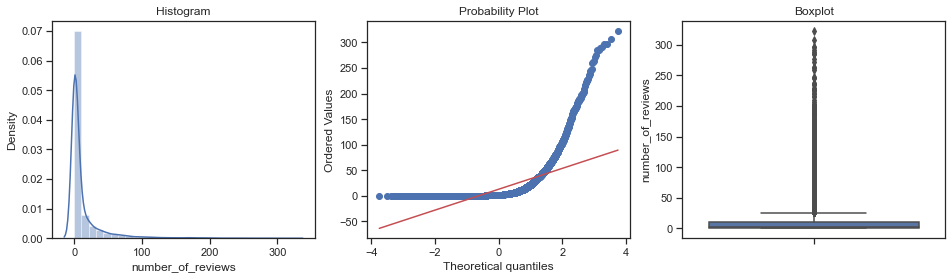

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


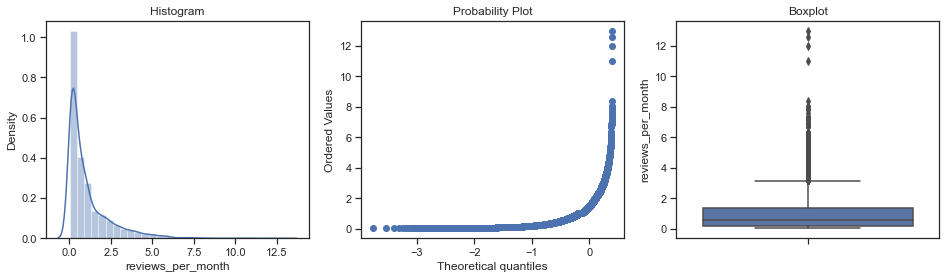

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


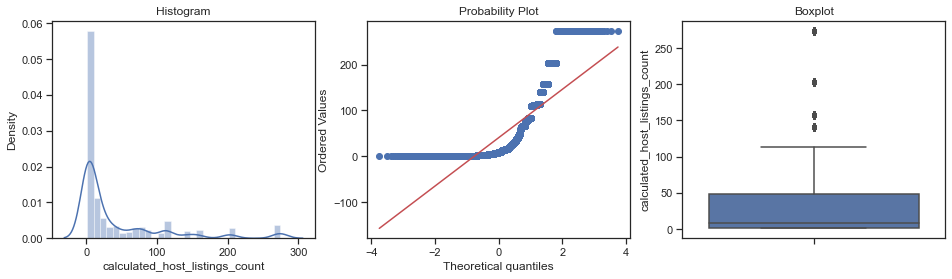

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


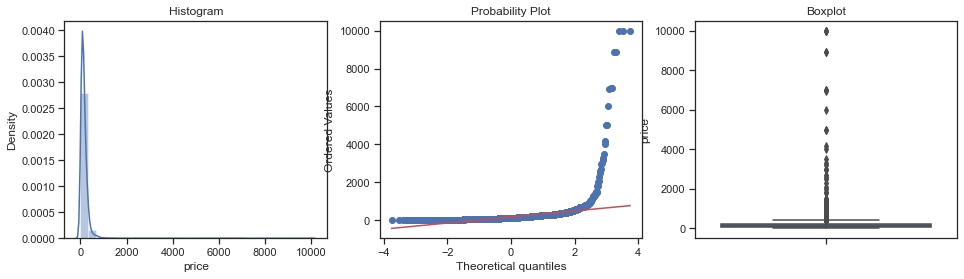

In [53]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

diagnostic_plots(data_tf, 'minimum_nights')
diagnostic_plots(data_tf, 'number_of_reviews')
diagnostic_plots(data_tf, 'reviews_per_month')
diagnostic_plots(data_tf, 'calculated_host_listings_count')
diagnostic_plots(data_tf, 'price')

### 2.2 Cleanse and Transform the data

In [54]:
pipe = Pipeline(steps=[
    ('imp_num_arbi', mdi.ArbitraryNumberImputer(variables='reviews_per_month', arbitrary_number=0)),
    ('imp_cat_missing', mdi.CategoricalImputer(variables='last_review', imputation_method='missing')),
    ('tmp_cat_missing', mdi.CategoricalImputer(variables='name', imputation_method='missing'))
])

pipe.fit(df_airbnb)

df_airbnb = pipe.transform(df_airbnb)
df_airbnb[['last_review','reviews_per_month']].isnull().mean().sort_values()

last_review          0.0
reviews_per_month    0.0
dtype: float64

In [55]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

RM_upper_limit, RM_lower_limit = find_boundaries(df_airbnb, 'minimum_nights', 1.5)
outliers_nights = np.where(df_airbnb['minimum_nights'] > RM_upper_limit, True,
                       np.where(df_airbnb['minimum_nights'] < RM_lower_limit, True, False))

df_airbnb = df_airbnb.loc[~outliers_nights ]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


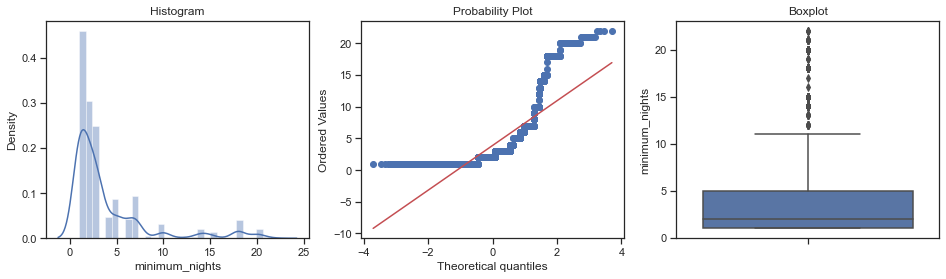

In [56]:
diagnostic_plots(df_airbnb, 'minimum_nights')

In [57]:
df_airbnb = df_airbnb.loc[df_airbnb['neighbourhood_group'] == 'Central Region']

In [58]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28875,103.80814,Private room,44,15,18,2019-04-21,0.23,32,331
13,294281,5 mins walk from Newton subway,1521514,Elizabeth,Central Region,Newton,1.31125,103.83816,Private room,65,2,125,2019-08-22,1.35,6,336
19,369141,5mins from Newton Train Station,1521514,Elizabeth,Central Region,Newton,1.31150,103.83759,Private room,60,2,84,2019-07-10,1.17,6,340
20,369145,5 mins walk from Newton MRT,1521514,Elizabeth,Central Region,Newton,1.31159,103.83805,Private room,60,2,157,2019-08-15,1.75,6,349
25,604966,Boutique 1 bedroom entiere appart,2996022,Frederic,Central Region,Bukit Timah,1.33171,103.79383,Entire home/apt,276,4,11,2018-01-07,0.13,1,362


In [59]:
ohe_enc = OneHotEncoder(
    top_categories=5,  
    variables=['room_type'],
    drop_last=False)
ohe_enc.fit(df_airbnb)
df_airbnb = ohe_enc.transform(df_airbnb)

count_enc = CountFrequencyEncoder(
    encoding_method='count',
    variables=None)
count_enc.fit(df_airbnb)
df_airbnb = count_enc.transform(df_airbnb)

minimum_nights


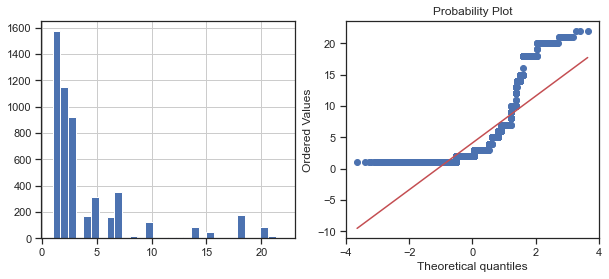

number_of_reviews


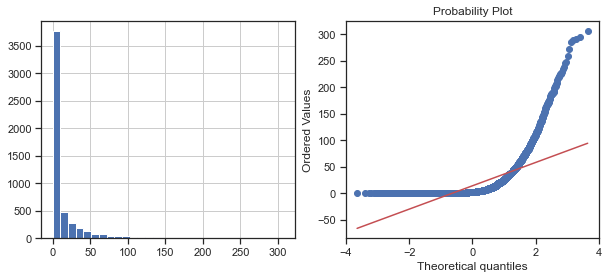

reviews_per_month


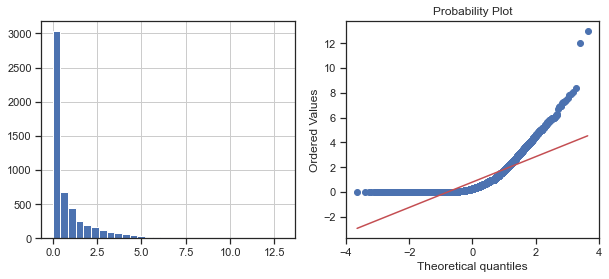

calculated_host_listings_count


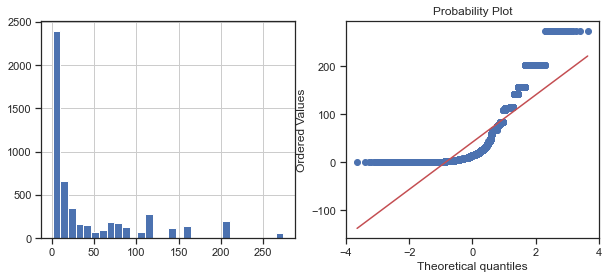

In [60]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    print(variable)
    plt.show()

diagnostic_plots(df_airbnb, 'minimum_nights')
diagnostic_plots(df_airbnb, 'number_of_reviews')
diagnostic_plots(df_airbnb, 'reviews_per_month')
diagnostic_plots(df_airbnb, 'calculated_host_listings_count')

In [61]:
df_airbnb[['minimum_nights']] = np.power(df_airbnb[['minimum_nights']],0.5)
df_airbnb[['number_of_reviews']] = np.power(df_airbnb[['number_of_reviews']],0.5)
df_airbnb[['reviews_per_month']] = np.power(df_airbnb[['reviews_per_month']],0.5)
df_airbnb[['calculated_host_listings_count']] = np.power(df_airbnb[['calculated_host_listings_count']],0.5)

minimum_nights


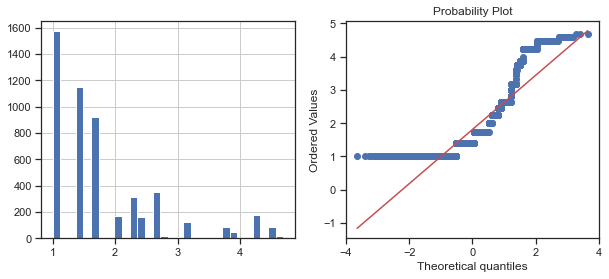

number_of_reviews


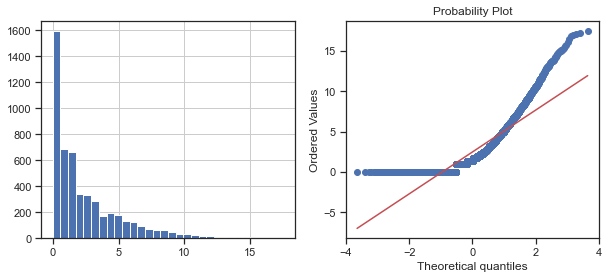

reviews_per_month


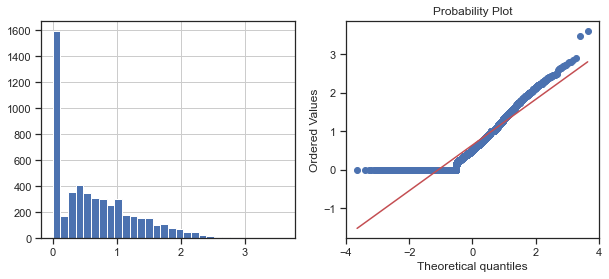

calculated_host_listings_count


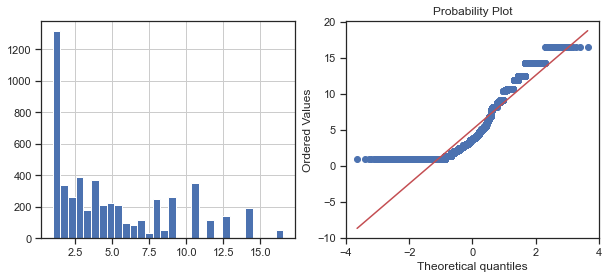

In [62]:
diagnostic_plots(df_airbnb, 'minimum_nights')
diagnostic_plots(df_airbnb, 'number_of_reviews')
diagnostic_plots(df_airbnb, 'reviews_per_month')
diagnostic_plots(df_airbnb, 'calculated_host_listings_count')

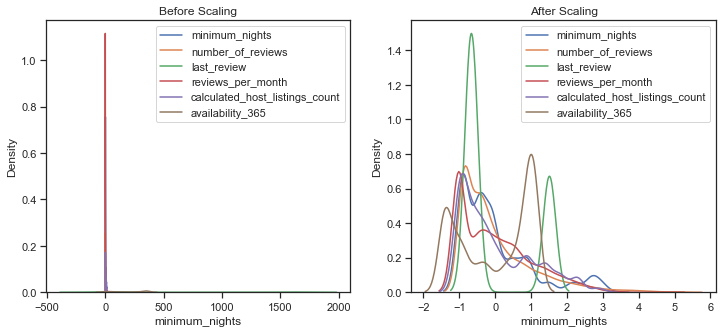

In [63]:
num_cols = ['minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']
df_target = df_airbnb['price']
df_scale = df_airbnb.drop(columns=['price'])
#scaler = StandardScaler()
#scaler.fit(df_airbnb)
#airbnb_scaled = scaler.transform(df_airbnb)
#airbnb_sScaled = pd.DataFrame(airbnb_scaled, columns=df_airbnb.columns)
scaler = StandardScaler()
scaler.fit(df_scale)
airbnb_scaled = scaler.transform(df_scale)
airbnb_sScaled = pd.DataFrame(airbnb_scaled, columns=df_scale.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')

for i in num_cols:
    sns.kdeplot(df_airbnb[i], ax=ax1, label =i)

ax1.legend()

ax2.set_title('After Scaling')

for i in num_cols:
    sns.kdeplot(airbnb_sScaled[i], ax=ax2, label =i)
    
ax2.legend()
plt.show()

In [64]:
airbnb_sScaled = airbnb_sScaled.reset_index(drop=True)
df_target = df_target.reset_index(drop=True)
df_airbnb = airbnb_sScaled
df_airbnb['price'] = df_target

In [65]:
df_target

0        44
1        65
2        60
3        60
4       276
       ... 
5241     33
5242    100
5243    100
5244    550
5245     56
Name: price, Length: 5246, dtype: int64

In [66]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5246 entries, 0 to 5245
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5246 non-null   float64
 1   name                            5246 non-null   float64
 2   host_id                         5246 non-null   float64
 3   host_name                       5246 non-null   float64
 4   neighbourhood_group             5246 non-null   float64
 5   neighbourhood                   5246 non-null   float64
 6   latitude                        5246 non-null   float64
 7   longitude                       5246 non-null   float64
 8   minimum_nights                  5246 non-null   float64
 9   number_of_reviews               5246 non-null   float64
 10  last_review                     5246 non-null   float64
 11  reviews_per_month               5246 non-null   float64
 12  calculated_host_listings_count  52

### 2.3 Correlation Analysis

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of features', size=15)
ax = sns.heatmap(df_airbnb.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
df_airbnb['host_reputation'] = (df_airbnb['calculated_host_listings_count'] + df_airbnb['reviews_per_month']) / 2

In [ ]:
df_airbnb = df_airbnb.drop(['id','host_name','name'], axis = 1)

In [ ]:
sns.set(style="ticks")
sns.pairplot(df_airbnb[['number_of_reviews','reviews_per_month']])

### 2.4 Export the data

In [ ]:
df_airbnb.to_csv('listings_new.csv', index=False)